In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [15]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [16]:
# Find the most recent date in the measurement data set.
for row in session.query(func.max(measurement.date)):
    print(row)

('2017-08-23',)


In [17]:
#Generate queries to create dataframes from
prcp_date=session.query(measurement).filter(measurement.date >= '2016-08-23')
station_q=session.query(station)

In [20]:
#Create measurement dataframe
measurement_df = pd.read_sql(prcp_date.statement, con=session.connection())

In [22]:
measurement_sort_clean_df=measurement_df.sort_values("date",ascending=False).dropna()

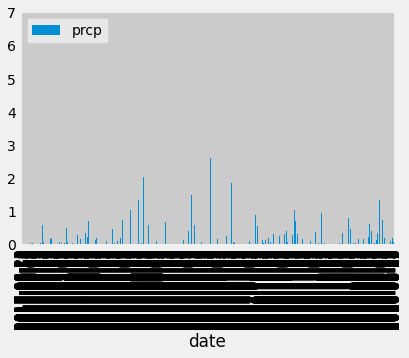

In [120]:
# Use Pandas Plotting with Matplotlib to plot precipitation over one year
measurement_sort_clean_df.plot.bar(y="prcp")
plt.savefig('Resources\precipitation.png')

In [138]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurement_sort_clean_df['prcp'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [23]:
#Create stations dataframe
station_df = pd.read_sql(station_q.statement, con=session.connection(), index_col="station")

,id,name,latitude,longitude,elevation
station,,,,,
USC00519397,1,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
USC00513117,2,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
USC00514830,3,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
USC00517948,4,"PEARL CITY, HI US",21.39340,-157.97510,11.9
USC00518838,5,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
USC00519523,6,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
USC00519281,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
USC00511918,8,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
USC00516128,9,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [24]:
#Merge measurement and stations dataframes
stat_meas=pd.merge(measurement_sort_clean_df,station_df,how='inner',on='station')

In [25]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
#Sort stations to find the station with the most rows
station_group=stat_meas.groupby(['station'])
station_count=station_group['date'].count()
station_sort=station_count.sort_values(ascending=False)
station_sort

station
USC00519397    359
USC00519281    352
USC00513117    343
USC00516128    328
USC00519523    314
USC00514830    265
USC00517948     60
Name: date, dtype: int64

In [27]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station_filt_df=stat_meas[(stat_meas['station']=='USC00519397')]
active_station_filt_df['tobs'].describe()

count    359.000000
mean      75.197772
std        4.973381
min       60.000000
25%       72.000000
50%       77.000000
75%       79.000000
max       87.000000
Name: tobs, dtype: float64

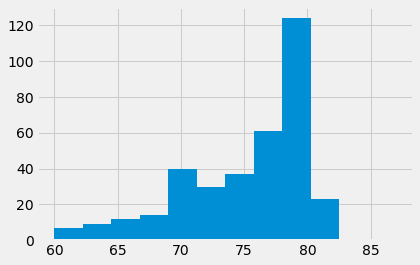

In [30]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.hist(x=active_station_filt_df['tobs'],bins=12)
plt.show()

# Close session

In [31]:
# Close Session
session.close()